In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Boston = pd.read_csv('Boston.csv', index_col=0)

In [4]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Simple linear regression model, with *medv* as a response and *lstat* as a predictor.

In [5]:
data = Boston[['lstat', 'medv']]
data.index = np.arange(0, len(data))

In [6]:
lstat = np.array(data['lstat']).reshape((-1, 1))
medv = data['medv']

In [7]:
#SLR_model = LinearRegression().fit(x, y) it can be done this way or:

Simple linear regression using statsmodels

In [8]:
x = sm.add_constant(lstat)

In [9]:
model = sm.OLS(medv, x)
results = model.fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           5.08e-88
Time:                        15:47:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [11]:
print(results.predict(x[[4, 9, 14]]))

[29.49007782 18.30799693 24.80633451]


This is one way to plot the linear regression: y is calculated manually from y = intercept + slope * x
There is a quick way to plot it using seaborn. It is done below the first graph. It includes confidence intervals stright away.

In [12]:
y = 34.5538 + lstat * -0.95

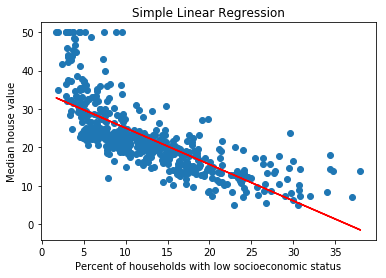

In [13]:
ax = plt.scatter(lstat, medv)
ax = plt.plot(lstat, y, '-r')
plt.ylabel('Median house value')
plt.xlabel('Percent of households with low socioeconomic status')
plt.title('Simple Linear Regression')
plt.show()

C:\Users\annak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


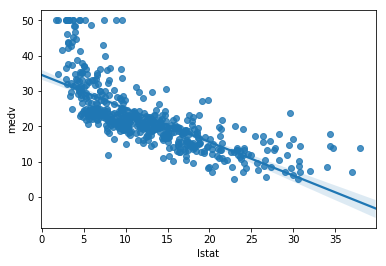

In [14]:
sns.regplot(x='lstat', y='medv', data=Boston, scatter=True, fit_reg=True, ci=95)

*full_data* dataframe is used to collect regression data and residuals just for my visual comparison in a form of a table. 

In [15]:
pred = results.predict(x)
full_data = pd.DataFrame(lstat)
full_data['medv'] = medv
full_data['Predicted'] = pred
full_data['Residuals'] = results.resid
full_data.columns = ['lstat', 'medv', 'Predicted', 'Residual']
print(full_data.head())

   lstat  medv  Predicted  Residual
0   4.98  24.0  29.822595 -5.822595
1   9.14  21.6  25.870390 -4.270390
2   4.03  34.7  30.725142  3.974858
3   2.94  33.4  31.760696  1.639304
4   5.33  36.2  29.490078  6.709922


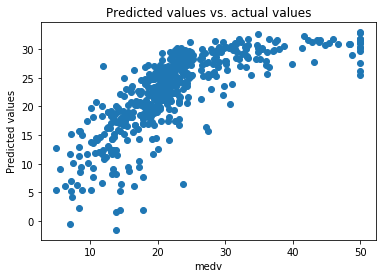

In [16]:
plt.scatter(full_data['medv'], full_data['Predicted'])
plt.xlabel('medv')
plt.ylabel('Predicted values')
plt.title('Predicted values vs. actual values')
plt.show()

medv vs. predicted values should should be plotted around y = x, but in here obviously there is an logarithm tendency

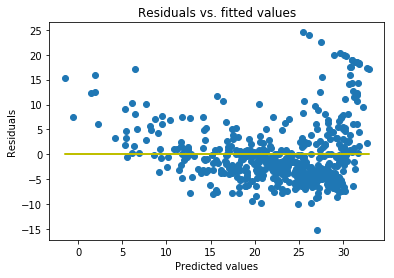

In [17]:
plt.scatter(full_data['Predicted'], full_data['Residual'])
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. fitted values')
line = np.zeros(len(full_data))
plt.plot(full_data['Predicted'], line, 'y')
plt.show()

Predicted values vs. residuals show an obvious tendency instead of being random.

Below there are two tests: for outliers and leverage points. 

In [18]:
outlier_test = results.outlier_test()
print (outlier_test[outlier_test['bonf(p)'] < 0.05])

     student_resid   unadj_p   bonf(p)
371       4.004703  0.000071  0.036162


In [19]:
infl = results.get_influence()

Figure(432x288)


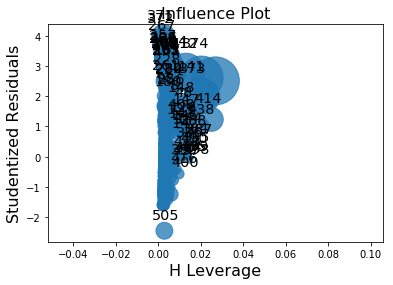

In [20]:
print(sm.graphics.influence_plot(results))